# Importando las bibliotecas necesarias 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency


# Sobre el Conjunto de Datos 'gym_members_exercise_tracking.csv' 

Este conjunto de datos proporciona una visión detallada de las rutinas de ejercicio, atributos físicos y métricas de fitness de los miembros de un gimnasio. Contiene 973 muestras de datos del gimnasio, incluyendo indicadores clave de rendimiento como la frecuencia cardíaca, calorías quemadas y duración del entrenamiento. Cada entrada también incluye datos demográficos y niveles de experiencia, lo que permite un análisis exhaustivo de los patrones de fitness, la progresión de los atletas y las tendencias de salud.

Características Clave:

- Age: Edad del miembro del gimnasio.
- Gender: Género del miembro del gimnasio (Male o Female).
- Weight (kg): Peso del miembro en kilogramos.
- Height (m): Altura del miembro en metros.
- Max_BPM: Frecuencia cardíaca máxima (latidos por minuto) durante las sesiones de entrenamiento.
- Avg_BPM: Frecuencia cardíaca promedio durante las sesiones de entrenamiento.
- Resting_BPM: Frecuencia cardíaca en reposo antes del entrenamiento.
- Session_Duration (hours): Duración de cada sesión de entrenamiento en horas.
- Calories_Burned: Total de calorías quemadas durante cada sesión.
- Workout_Type: Tipo de entrenamiento realizado (por ejemplo, Cardio, Strength, Yoga, HIIT).
- Fat_Percentage: Porcentaje de grasa corporal del miembro.
- Water_Intake (liters): Ingesta diaria de agua durante los entrenamientos.
- Workout_Frequency (days/week): Número de sesiones de entrenamiento por semana.
- Experience_Level: Nivel de experiencia, desde principiante (1) hasta experto (3).
- BMI: Índice de Masa Corporal, calculado a partir de la altura y el peso.

# Cargar el archivo CSV

In [118]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
# Mostrar las primeras filas del DataFrame
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [119]:
# Mostrar información sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Cantidad de miembros por género

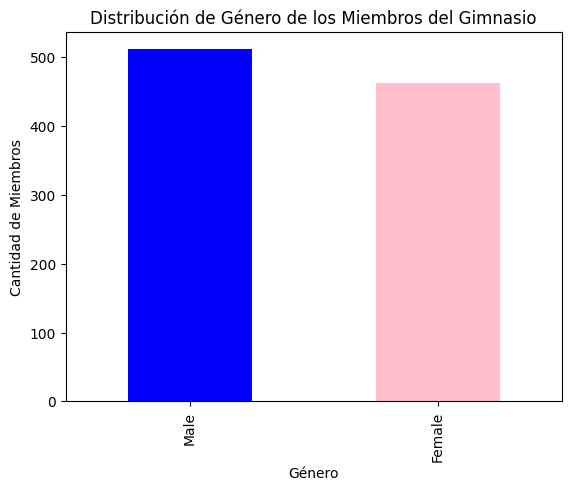

In [120]:
gender_counts = df['Gender'].value_counts()

# Generar el gráfico de barras
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de Género de los Miembros del Gimnasio')
plt.xlabel('Género')
plt.ylabel('Cantidad de Miembros')
plt.show()

# Proporción de cada género y su varianza

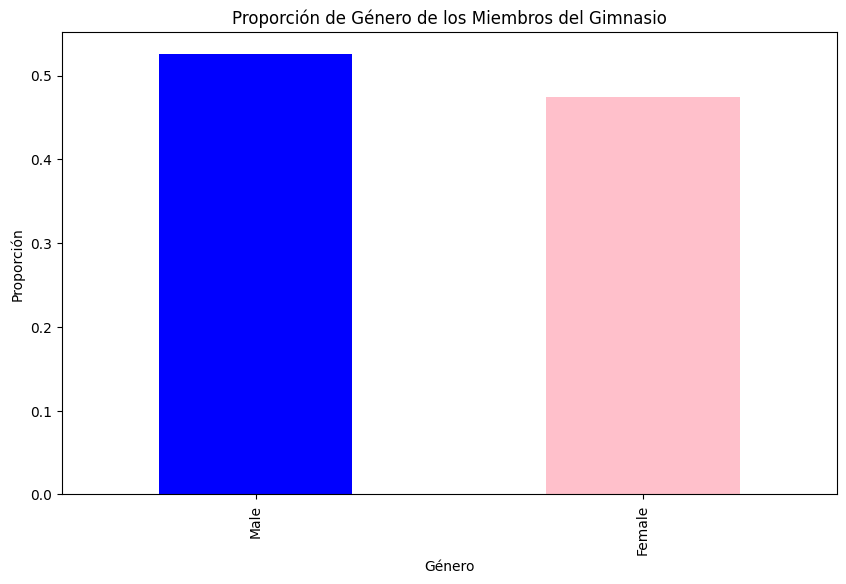

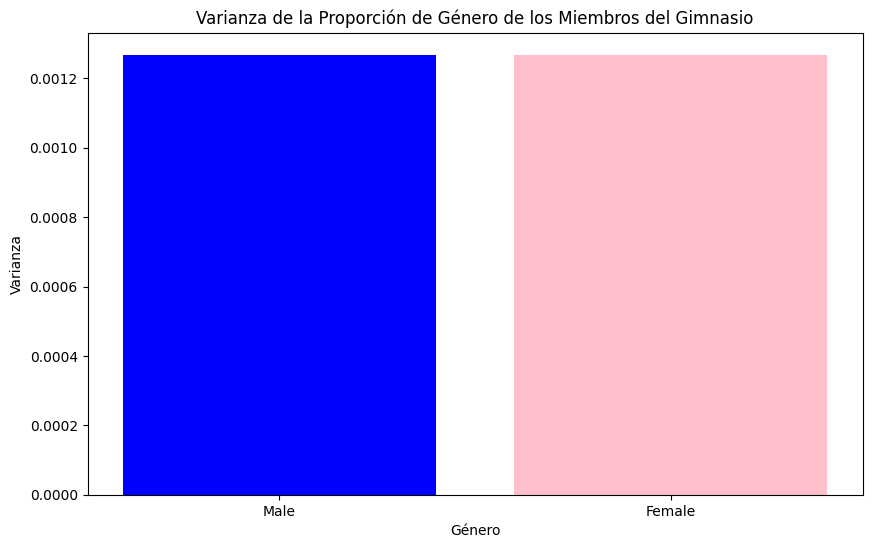

In [121]:
conteo_genero = df['Gender'].value_counts()

proporcion_genero = conteo_genero / len(df)

varianza_genero = np.var(proporcion_genero, ddof=1)

#Gráfico de barras para la proporción de género
plt.figure(figsize=(10, 6))
proporcion_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title('Proporción de Género de los Miembros del Gimnasio')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.show()

#Gráfico de barras para la varianza de la proporción de género
plt.figure(figsize=(10, 6))
plt.bar(proporcion_genero.index, [varianza_genero] * len(proporcion_genero), color=['blue', 'pink'])
plt.title('Varianza de la Proporción de Género de los Miembros del Gimnasio')
plt.xlabel('Género')
plt.ylabel('Varianza')
plt.show()


# Intervalo de confianza del 90% de la proporción de género

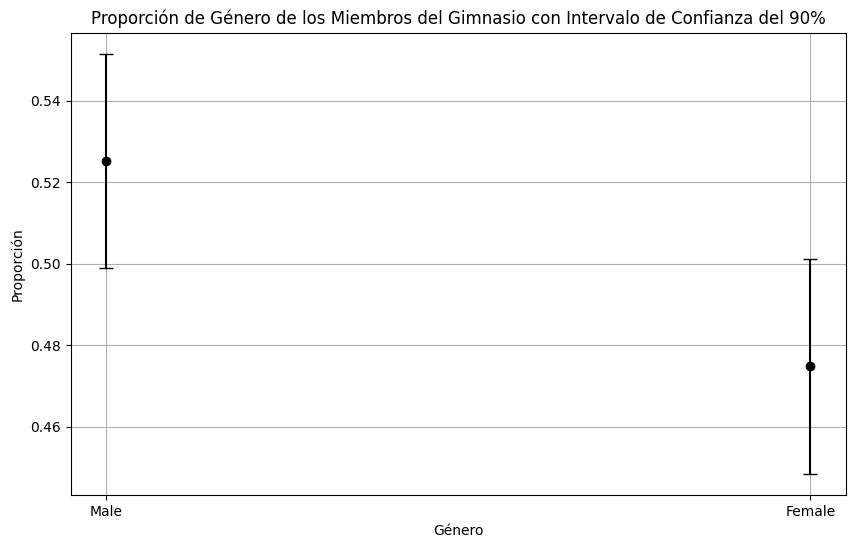

In [122]:
# Calcular el error estándar de la proporción
std_error = np.sqrt(proporcion_genero * (1 - proporcion_genero) / len(df))

# Calcular el intervalo de confianza del 90%
z_score = norm.ppf(0.95) 
ci_lower = proporcion_genero - z_score * std_error
ci_upper = proporcion_genero + z_score * std_error

# Gráfico de puntos con barras de error para la proporción de género con intervalo de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(proporcion_genero.index, proporcion_genero, yerr=[proporcion_genero - ci_lower, ci_upper - proporcion_genero], fmt='o', capsize=5, color='black')
plt.title('Proporción de Género de los Miembros del Gimnasio con Intervalo de Confianza del 90%')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.grid(True)
plt.show()

# Creando variable 'Calorias quemadas por minuto'.

In [123]:
df['Calorías_Quemadas_por_Minuto'] = df['Calories_Burned'] / (df['Session_Duration (hours)'] * 60)

print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

# Estimacion de Parámetros del BMI

In [124]:
data = df['BMI']
# Estimador puntual de la media
media_bmi = np.mean(data)

# Estimador puntual de la varianza
varianza_bmi = np.var(data, ddof=1)


print(f'Estimador puntual de la media de BMI: {media_bmi}')
print(f'Estimador puntual de la varianza de BMI: {varianza_bmi}')

Estimador puntual de la media de BMI: 24.91212744090442
Estimador puntual de la varianza de BMI: 44.36731429649931


# Se puede afirmar que más del 50% de las mujeres entrenan más de 3  días por semana ? 


H0 : p < 0.50  
H1: p > 0.50 


In [125]:
mujeres_df = df[df['Gender'] == 'Female']

mujeres_entrenan_mas_de_3_dias = mujeres_df[mujeres_df['Workout_Frequency (days/week)'] > 3]

p_techo = len(mujeres_entrenan_mas_de_3_dias) / len(mujeres_df)
n = len(mujeres_df)
p0 = 0.50
resultado = stats.binomtest(len(mujeres_entrenan_mas_de_3_dias), n, p0, alternative='greater')
alfa = 0.05

if resultado.pvalue < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que más del 50% de las mujeres entrenan más de 3 días por semana."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que más del 50% de las mujeres entrenan más de 3 días por semana."

print(f'Proporción de mujeres que entrenan más de 3 días por semana: {p_techo}')
print(f'Valor p: {resultado.pvalue}')
print(conclusion)

Proporción de mujeres que entrenan más de 3 días por semana: 0.4264069264069264
Valor p: 0.9993491437194888
No hay prueba suficiente para rechazar H0. No podemos concluir que más del 50% de las mujeres entrenan más de 3 días por semana.


# Histograma superpuesto del BMI de las modalidades Yoga y Fuerza

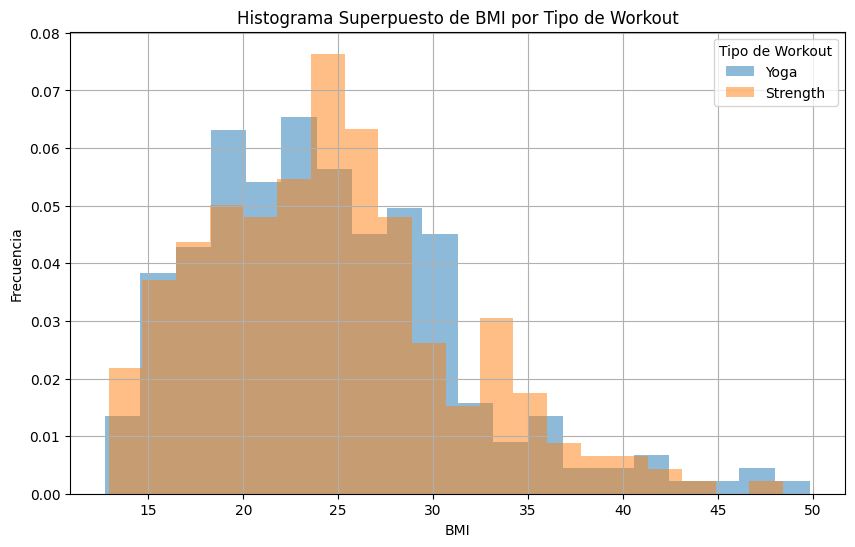

In [126]:
workout_types = ['Yoga', 'Strength']

plt.figure(figsize=(10, 6))

for workout in workout_types:
    workout_data = df[df['Workout_Type'] == workout]['BMI']
    plt.hist(workout_data, bins=20, alpha=0.5, label=workout, density=True)

plt.title('Histograma Superpuesto de BMI por Tipo de Workout')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Workout')
plt.grid(True)
plt.show()

# Se puede concluir que las personas que entrenan fuerza tienen un IMB mayor que las que hacen yoga ?

U1 : Media de IBM de los que practican Yoga

U2 : Media de IMB de los que practican Fuerza

H0 : U1 <= U2

H1 : U2 >= U3

In [127]:
yoga_bmi = df[df['Workout_Type'] == 'Yoga']['BMI']
fuerza_bmi = df[df['Workout_Type'] == 'Strength']['BMI']

media_yoga = yoga_bmi.mean()
media_fuerza = fuerza_bmi.mean()

estadistico_t, valor_p = stats.ttest_ind(fuerza_bmi, yoga_bmi, alternative='greater')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga."

# Mostrar los resultados
print(f'Media de BMI de Yoga: {media_yoga}')
print(f'Media de BMI de Fuerza: {media_fuerza}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

Media de BMI de Yoga: 24.54523012552301
Media de BMI de Fuerza: 24.54360465116279
Estadístico t: -0.002704197556727134
Valor p: 0.5010782727030919
No hay prueba suficiente para rechazar H0. No podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga.


# Se puede afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso ?

H0: mu >= 65

H1: mu < 65


In [128]:
cardio_df = df[df['Workout_Type'] == 'Cardio']

media_bpm_descanso = cardio_df['Resting_BPM'].mean()

estadistico_t, valor_p = stats.ttest_1samp(cardio_df['Resting_BPM'], 65, alternative='less')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso."


print(f'Media de BPM en descanso del grupo de cardio: {media_bpm_descanso}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

Media de BPM en descanso del grupo de cardio: 61.98823529411764
Estadístico t: -6.802335247009754
Valor p: 3.671496715825273e-11
Rechazamos H0. Podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso.


# Los hombres son más altos que las mujeres en promedio?

Media de Altura de Hombres: 1.7934050880626224
Media de Altura de Mujeres: 1.6442424242424243
Estadístico t: 22.38916448043216
Valor p: 3.7725646142111114e-90
Rechazamos H0. Podemos concluir que en media los hombres son más altos que las mujeres.


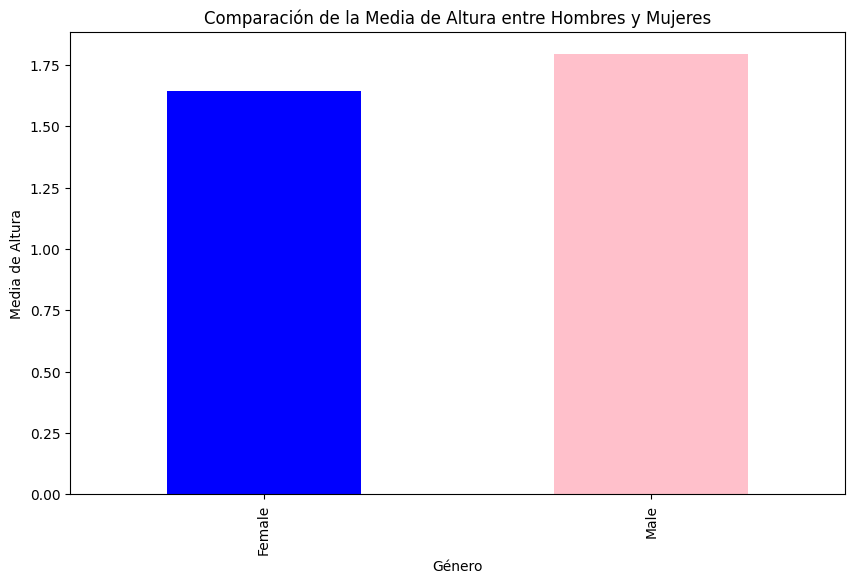

In [129]:
altura_hombres = df[df['Gender'] == 'Male']['Height (m)']
altura_mujeres = df[df['Gender'] == 'Female']['Height (m)']

media_hombres = altura_hombres.mean()
media_mujeres = altura_mujeres.mean()

estadistico_t, valor_p = stats.ttest_ind(altura_hombres, altura_mujeres, alternative='greater')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que en media los hombres son más altos que las mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que en media los hombres son más altos que las mujeres."

print(f'Media de Altura de Hombres: {media_hombres}')
print(f'Media de Altura de Mujeres: {media_mujeres}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)


mean_height_by_gender = df.groupby('Gender')['Height (m)'].mean()
plt.figure(figsize=(10, 6))
mean_height_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de la Media de Altura entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Media de Altura')
plt.show()

# Habrá una diferencia significativa en la media de edad entre hombres y mujeres?

Media de Edad de Hombres: 38.99804305283757
Media de Edad de Mujeres: 38.33549783549783
Estadístico t: 0.8471241754486699
Valor p: 0.3971346520504394
No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres.


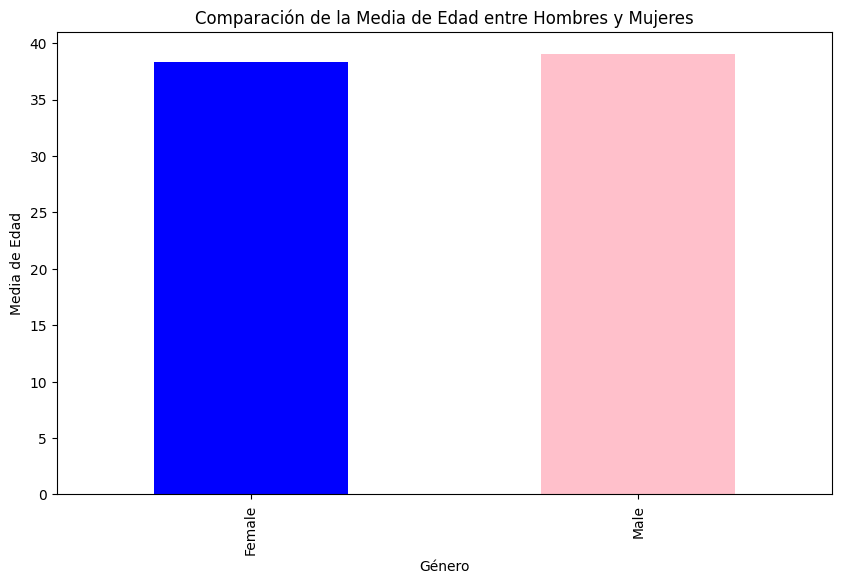

In [130]:
edad_hombres = df[df['Gender'] == 'Male']['Age']
edad_mujeres = df[df['Gender'] == 'Female']['Age']

media_hombres = edad_hombres.mean()
media_mujeres = edad_mujeres.mean()

estadistico_t, valor_p = stats.ttest_ind(edad_hombres, edad_mujeres, alternative='two-sided')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres."

print(f'Media de Edad de Hombres: {media_hombres}')
print(f'Media de Edad de Mujeres: {media_mujeres}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de edad entre hombres y mujeres
mean_age_by_gender = df.groupby('Gender')['Age'].mean()
plt.figure(figsize=(10, 6))
mean_age_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de la Media de Edad entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Media de Edad')
plt.show()

# Se puede afirmar que hay una diferencia significativa en las calorías quemadas entre las personas que tienen un porcentaje de grasa mayor al 30% y las que tienen un 30% o menos?

Media de Calorías Quemadas (>30% fat): 785.0364583333334
Media de Calorías Quemadas (<=30% fat): 935.0179257362356
Estadístico t: -6.9955017801749175
Valor p: 4.918218691819202e-12
Rechazamos H0. Podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos.


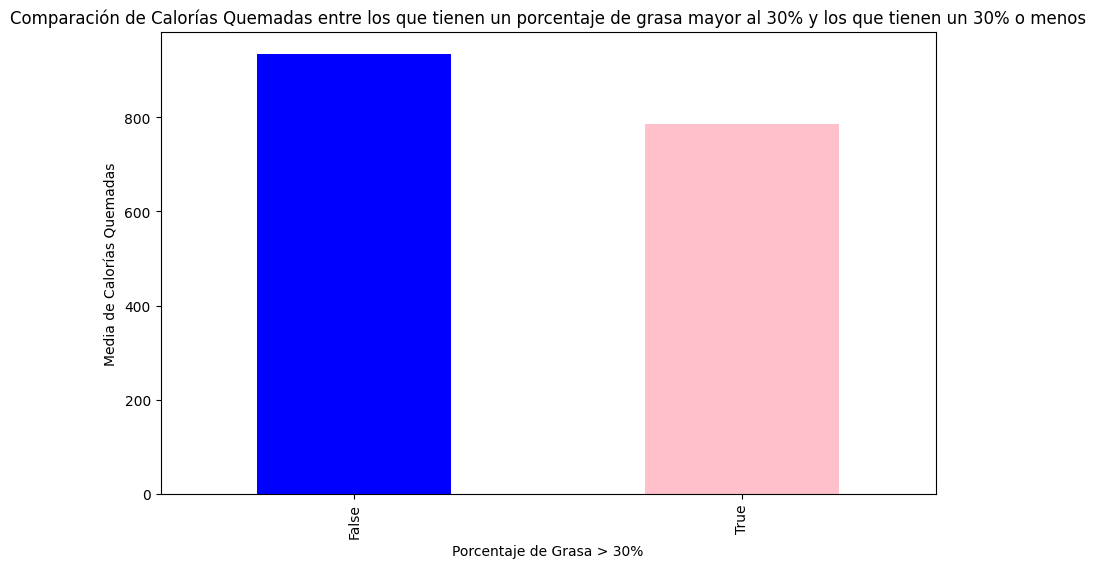

In [131]:
calorias_mas_30_fat = df[df['Fat_Percentage'] > 30]['Calories_Burned']
calorias_menos_30_fat = df[df['Fat_Percentage'] <= 30]['Calories_Burned']

media_mas_30_fat = calorias_mas_30_fat.mean()
media_menos_30_fat = calorias_menos_30_fat.mean()


estadistico_t, valor_p = stats.ttest_ind(calorias_mas_30_fat, calorias_menos_30_fat, alternative='two-sided')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."

print(f'Media de Calorías Quemadas (>30% fat): {media_mas_30_fat}')
print(f'Media de Calorías Quemadas (<=30% fat): {media_menos_30_fat}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

mean_calories_by_fat = df.groupby(df['Fat_Percentage'] > 30)['Calories_Burned'].mean()
plt.figure(figsize=(10, 6))
mean_calories_by_fat.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Calorías Quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos')
plt.xlabel('Porcentaje de Grasa > 30%')
plt.ylabel('Media de Calorías Quemadas')
plt.show()

# Se puede afirmar que hay una diferencia significativa en el consumo de agua entre las personas que tienen un porcentaje de grasa mayor al 30% y las que tienen 30% o menos?

Media de Consumo de Agua (>30% fat): 2.0963541666666665
Media de Consumo de Agua (<=30% fat): 2.7569782330345713
Estadístico t: -15.194852098938306
Valor p: 6.11427146742458e-47
Rechazamos H0. Podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos.


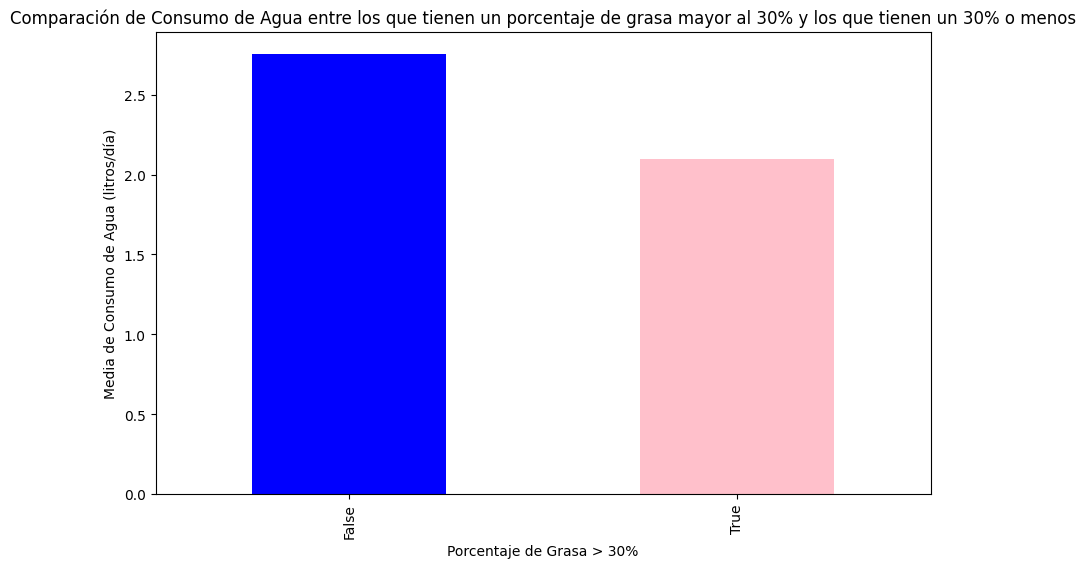

In [132]:
agua_mas_30_fat = df[df['Fat_Percentage'] > 30]['Water_Intake (liters)']
agua_menos_30_fat = df[df['Fat_Percentage'] <= 30]['Water_Intake (liters)']

media_mas_30_fat = agua_mas_30_fat.mean()
media_menos_30_fat = agua_menos_30_fat.mean()

estadistico_t, valor_p = stats.ttest_ind(agua_mas_30_fat, agua_menos_30_fat, alternative='two-sided')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."

print(f'Media de Consumo de Agua (>30% fat): {media_mas_30_fat}')
print(f'Media de Consumo de Agua (<=30% fat): {media_menos_30_fat}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

mean_water_by_fat = df.groupby(df['Fat_Percentage'] > 30)['Water_Intake (liters)'].mean()
plt.figure(figsize=(10, 6))
mean_water_by_fat.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Consumo de Agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos')
plt.xlabel('Porcentaje de Grasa > 30%')
plt.ylabel('Media de Consumo de Agua (litros/día)')
plt.show()

# Se puede afirmar que hay una diferencia significativa en la cantidad de agua consumida entre las personas que hacen yoga y las que no?

Media de Consumo de Agua (Yoga): 2.6422594142259412
Media de Consumo de Agua (No Yoga): 2.621525885558583
Estadístico t: 0.463673904100769
Valor p: 0.6785073422525099
No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga.


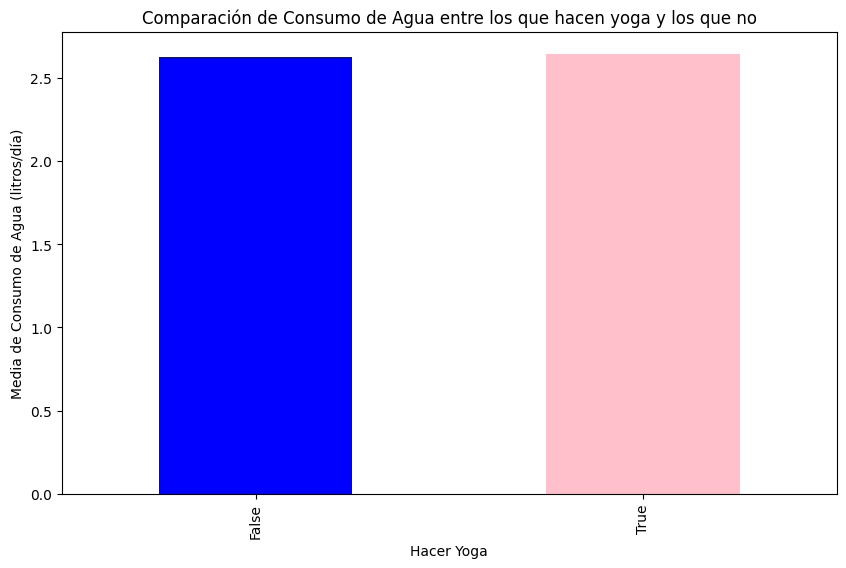

In [133]:
agua_yoga = df[df['Workout_Type'] == 'Yoga']['Water_Intake (liters)']
agua_no_yoga = df[df['Workout_Type'] != 'Yoga']['Water_Intake (liters)']

media_yoga = agua_yoga.mean()
media_no_yoga = agua_no_yoga.mean()


estadistico_t, valor_p = stats.ttest_ind(agua_yoga, agua_no_yoga, alternative='less')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga."

# Show the results
print(f'Media de Consumo de Agua (Yoga): {media_yoga}')
print(f'Media de Consumo de Agua (No Yoga): {media_no_yoga}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

mean_water_by_workout = df.groupby(df['Workout_Type'] == 'Yoga')['Water_Intake (liters)'].mean()
plt.figure(figsize=(10, 6))
mean_water_by_workout.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Consumo de Agua entre los que hacen yoga y los que no')
plt.xlabel('Hacer Yoga')
plt.ylabel('Media de Consumo de Agua (litros/día)')
plt.show()

# Se puede afirmar que hay una diferencia significativa en la media de pulsaciones por minuto entre las personas que hacen ejercicios de fuerza y las que hacen yoga?

Media de Avg_BPM (Strength): 144.3139534883721
Media de Avg_BPM (Yoga): 143.26778242677824
Estadístico t: 0.7982778507098587
Valor p: 0.21254603883692025
No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga.


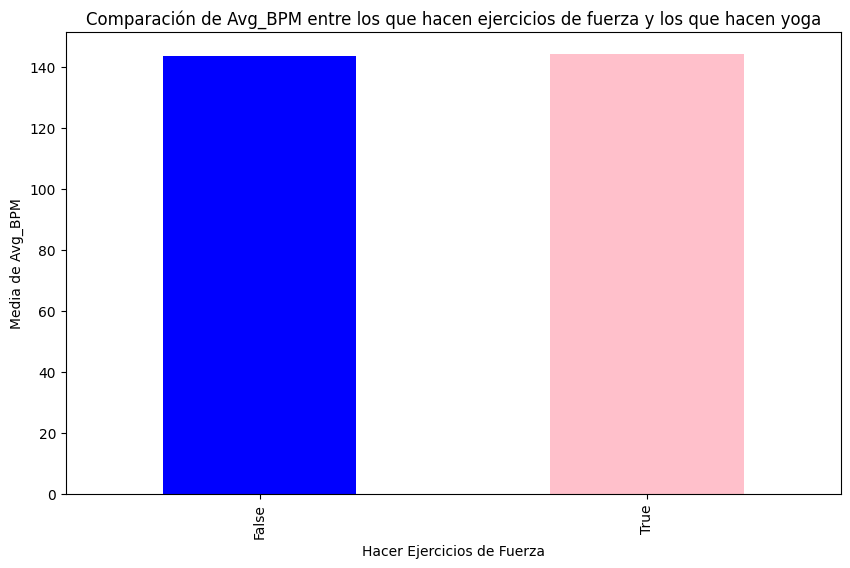

In [134]:

bpm_strength = df[df['Workout_Type'] == 'Strength']['Avg_BPM']
bpm_yoga = df[df['Workout_Type'] == 'Yoga']['Avg_BPM']

media_strength = bpm_strength.mean()
media_yoga = bpm_yoga.mean()

estadistico_t, valor_p = stats.ttest_ind(bpm_strength, bpm_yoga, alternative='greater')

alfa = 0.05

if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga."

# Show the results
print(f'Media de Avg_BPM (Strength): {media_strength}')
print(f'Media de Avg_BPM (Yoga): {media_yoga}')
print(f'Estadístico t: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)


mean_bpm_by_workout = df.groupby(df['Workout_Type'] == 'Strength')['Avg_BPM'].mean()
plt.figure(figsize=(10, 6))
mean_bpm_by_workout.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Avg_BPM entre los que hacen ejercicios de fuerza y los que hacen yoga')
plt.xlabel('Hacer Ejercicios de Fuerza')
plt.ylabel('Media de Avg_BPM')
plt.show()

# Se puede afirmar que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio?

Coeficiente de correlación: 0.5761501254548647
Valor p: 0.000854127292880474
Rechazamos H0. Podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio.


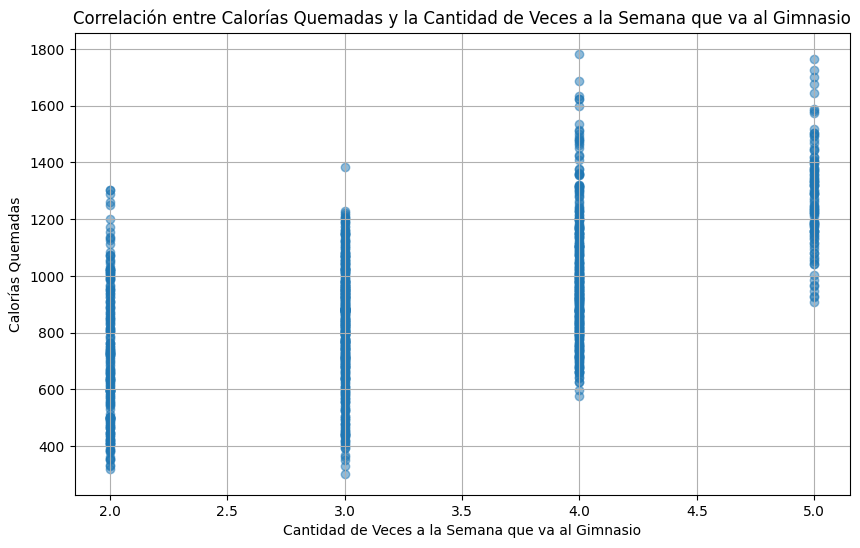

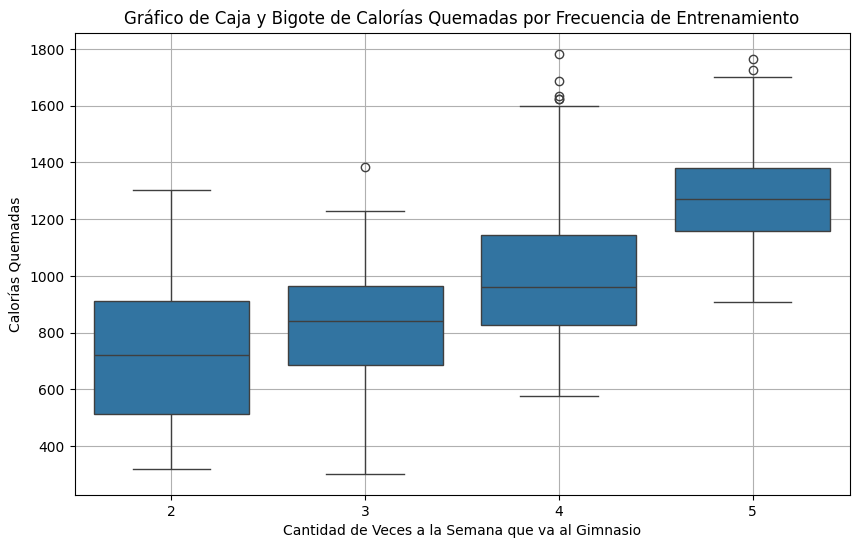

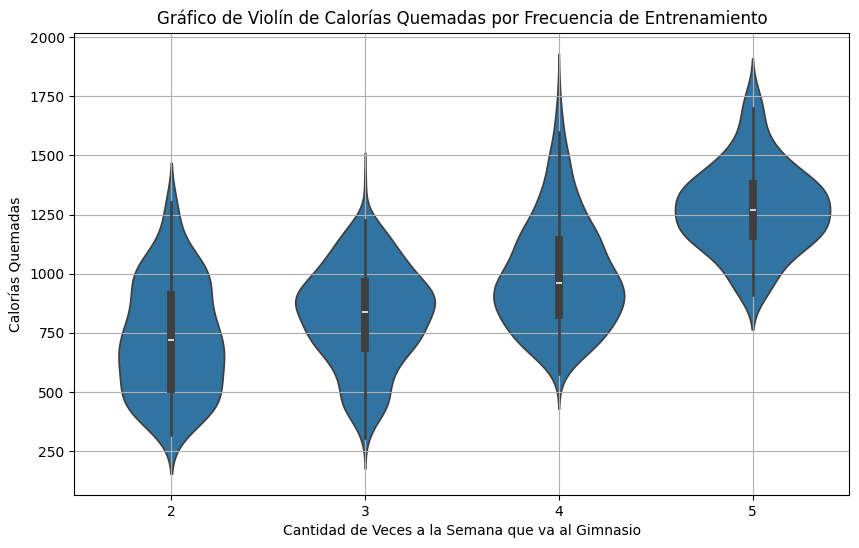

In [7]:
# Coeficiente de correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(df['Calories_Burned'], df['Workout_Frequency (days/week)'])

# Tabla de contingencia para la prueba Chi-Cuadrado de Independencia
contingency_table = pd.crosstab(df['Calories_Burned'], df['Workout_Frequency (days/week)'])

# Prueba Chi-Cuadrado de Independencia
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio."

print(f'Coeficiente de correlación: {correlation_coefficient}')
print(f'Valor p: {p_value}')
print(conclusion)

plt.figure(figsize=(10, 6))
plt.scatter(df['Workout_Frequency (days/week)'], df['Calories_Burned'], alpha=0.5)
plt.title('Correlación entre Calorías Quemadas y la Cantidad de Veces a la Semana que va al Gimnasio')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Gráfico de caja y bigote
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df)
plt.title('Gráfico de Caja y Bigote de Calorías Quemadas por Frecuencia de Entrenamiento')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df)
plt.title('Gráfico de Violín de Calorías Quemadas por Frecuencia de Entrenamiento')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Se puede afirmar que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones?

Coeficiente de correlación: 0.7647681188532216
Valor p: 4.277478776351479e-135
Rechazamos H0. Podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones.


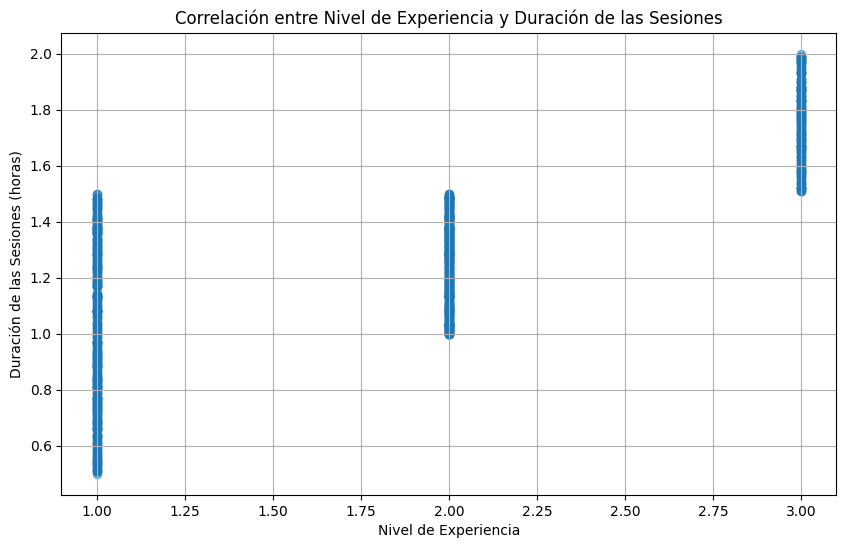

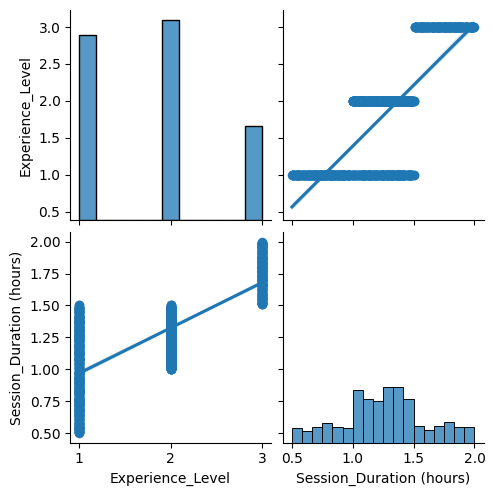

In [8]:
# Coeficiente de correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(df['Experience_Level'], df['Session_Duration (hours)'])

# Tabla de contingencia para la prueba Chi-Cuadrado de Independencia
contingency_table = pd.crosstab(df['Experience_Level'], df['Session_Duration (hours)'])

# Prueba Chi-Cuadrado de Independencia
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones."

print(f'Coeficiente de correlación: {correlation_coefficient}')
print(f'Valor p: {p_value}')
print(conclusion)

plt.figure(figsize=(10, 6))
plt.scatter(df['Experience_Level'], df['Session_Duration (hours)'], alpha=0.5)
plt.title('Correlación entre Nivel de Experiencia y Duración de las Sesiones')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Duración de las Sesiones (horas)')
plt.grid(True)
plt.show()

# Pair plot para comparar correlación
sns.pairplot(df, vars=['Experience_Level', 'Session_Duration (hours)'], kind='reg')
plt.show()

# Prueba de Levene para comparar las varianzas entre el grupo de personas con mas de 30% de grasa corporal y las que tienen 30% o menos

H0: Las varianzas de los dos grupos no son iguales.

H1: Las varianzas de los dos grupos son iguales.



In [137]:
alpha = 0.05

fat_greater_30 = df[df['Fat_Percentage'] > 30]['Fat_Percentage']
fat_less_equal_30 = df[df['Fat_Percentage'] <= 30]['Fat_Percentage']

statistic, p_value = stats.levene(fat_greater_30, fat_less_equal_30)

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que las varianzas de los dos grupos son iguales."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que las varianzas de los dos grupos son iguales."

print("Estadístico de Levene:", statistic)
print("P-value:", p_value)
print(conclusion)

Estadístico de Levene: 142.5422467743993
P-value: 9.342111564132657e-31
Rechazamos H0. Podemos concluir que las varianzas de los dos grupos son iguales.


# Prueba Kolmogorov-Smirnov para comparar la distribución de BMI con una distribución normal
 H0: La distribución de BMI no sigue una distribución normal.
 
 H1: La distribución de BMI sigue una distribución normal.



KS Statistic: 0.05620385713516651
P-value: 0.004109560807314723
Rechazamos H0. Podemos concluir que la distribución de BMI sigue una distribución normal.


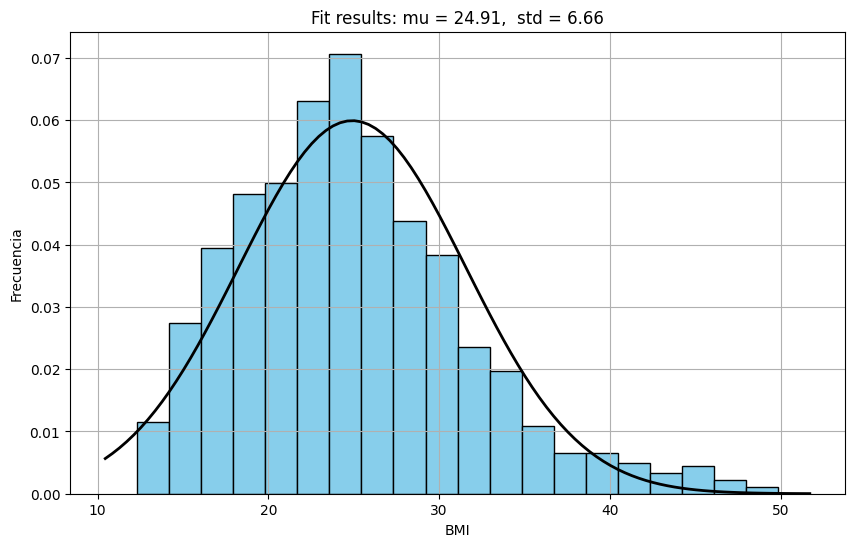

In [138]:
alpha = 0.05

data = df['BMI']


statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))


if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que la distribución de BMI sigue una distribución normal."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que la distribución de BMI sigue una distribución normal."


print("KS Statistic:", statistic)
print("P-value:", p_value)
print(conclusion)


plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Histograma de la variable BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.grid(True)


mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Comparación de la Media de Duración de Entrenamiento entre Hombres y Mujeres con Prueba T

H0: No hay diferencia significativa en la duración de entrenamiento entre hombres y mujeres (media_hombres = media_mujeres)

 H1: Hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres (media_hombres ≠ media_mujeres)


In [139]:
duracion_hombres = df[df['Gender'] == 'Male']['Session_Duration (hours)']
duracion_mujeres = df[df['Gender'] == 'Female']['Session_Duration (hours)']

alpha = 0.05
statistic, p_value = stats.ttest_ind(duracion_hombres, duracion_mujeres, equal_var=True)

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres."

print("Estadístico t:", statistic)
print("P-value:", p_value)
print(conclusion)

Estadístico t: -0.380190210019468
P-value: 0.7038873724084256
No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres.
